In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [118]:
dataset=pd.read_csv('/content/Dataset .csv')
dataset.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [119]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [121]:
dataset.isnull().sum().sum()

9

In [122]:
dataset['Cuisines']=dataset['Cuisines'].fillna(dataset['Cuisines'].mode()[0])

In [123]:
dataset.duplicated().sum()

0

In [124]:
dataset.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [125]:
dataset.count()

,0
Restaurant ID,9551
Restaurant Name,9551
Country Code,9551
City,9551
Address,9551
Locality,9551
Locality Verbose,9551
Longitude,9551
Latitude,9551
Cuisines,9551


# Analyze the text reviews to identify the most common positive and negative keywords.

In [126]:
data=dataset['Rating text'].value_counts().sort_values(ascending=False)
common_keywords = data.index.to_series().apply(lambda x: 'positive' if x in ['Average','Good','Very Good' ,'Excellent'] else 'negative')
common_keywords

,Rating text
Rating text,
Average,positive
Not rated,negative
Good,positive
Very Good,positive
Excellent,positive
Poor,negative


# Calculate the average length of reviews and explore if there is a relationship between review length and rating.

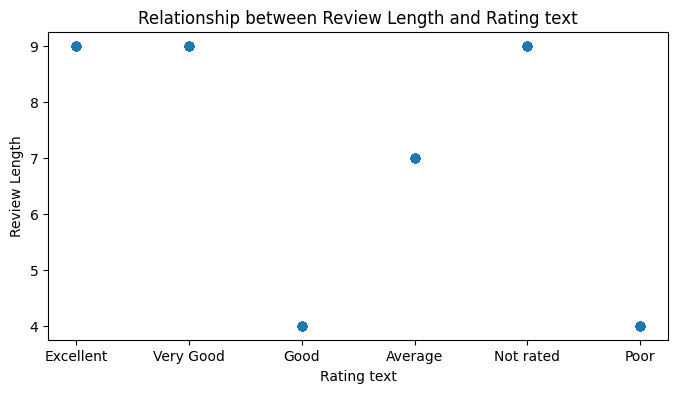

Average Review Length: 7.020730813527379


In [127]:
review_Length=dataset['Rating text'].str.len()
average_review_length=review_Length.mean()
plt.figure(figsize=(8, 4))


plt.scatter(dataset['Rating text'], review_Length, alpha=0.10)

plt.title('Relationship between Review Length and Rating text')
plt.xlabel('Rating text')
plt.ylabel('Review Length')
plt.show()


print("Average Review Length:", average_review_length)

# Identify the restaurants with the highest and lowest number of votes.

In [128]:
restaurant_with_max_votes = dataset.loc[dataset['Votes'].idxmax()]

# Find the restaurant with the lowest number of votes
restaurant_with_min_votes = dataset.loc[dataset['Votes'].idxmin()]

# Display the results
print("Restaurant with the highest votes:")
print(restaurant_with_max_votes)

print("\nRestaurant with the lowest votes:")
print(restaurant_with_min_votes)

Restaurant with the highest votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has

# Analyze if there is a correlation between the number of votes and the rating of a restaurant.

0.31369058419541157


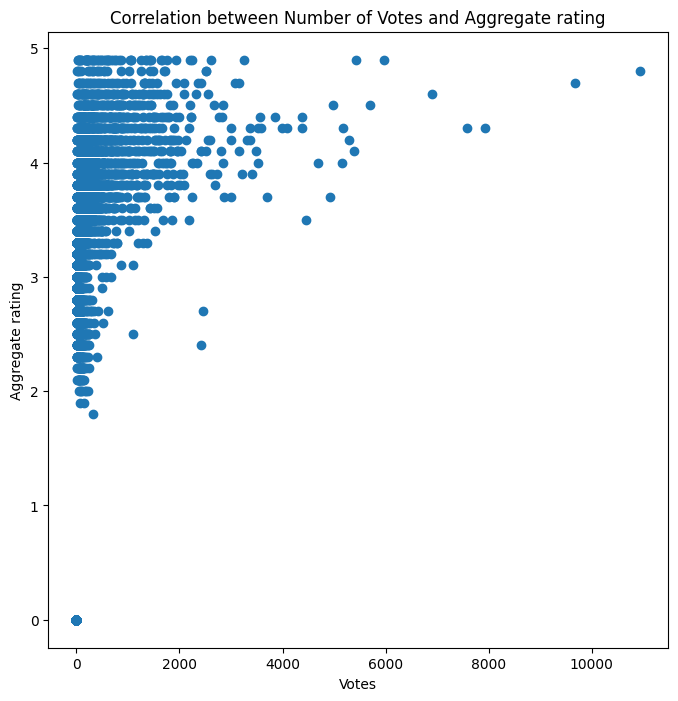

In [129]:
correlation=dataset['Votes'].corr(dataset['Aggregate rating'])
print(correlation)
plt.figure(figsize=(8,8))
plt.title('Correlation between Number of Votes and Aggregate rating')
plt.scatter(dataset['Votes'],dataset['Aggregate rating'])
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

                                        count      mean       std  min  25%  \
Has Table booking Has Online delivery                                         
No                No                   6377.0  1.604673  0.846276  1.0  1.0   
                  Yes                  2016.0  1.735119  0.610314  1.0  1.0   
Yes               No                    723.0  3.163209  0.676824  2.0  3.0   
                  Yes                   435.0  2.804598  0.588662  1.0  2.0   

                                       50%  75%  max  
Has Table booking Has Online delivery                 
No                No                   1.0  2.0  4.0  
                  Yes                  2.0  2.0  4.0  
Yes               No                   3.0  4.0  4.0  
                  Yes                  3.0  3.0  4.0  


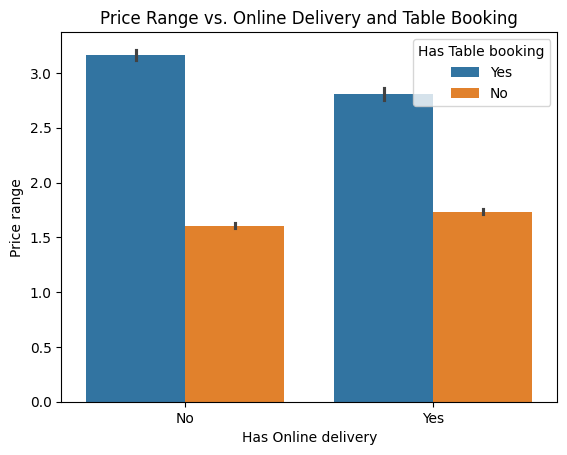

In [130]:
analysis=dataset.groupby(['Has Table booking', 'Has Online delivery'])['Price range'].describe()
print(analysis)

sns.barplot(y='Price range', x='Has Online delivery',hue='Has Table booking', data=dataset)
# Add labels and title
plt.xlabel('Has Online delivery')
plt.ylabel('Price range')
plt.title('Price Range vs. Online Delivery and Table Booking')

# Show the plot
plt.show()

# Determine if higher-priced restaurants are more likely to offer these services.



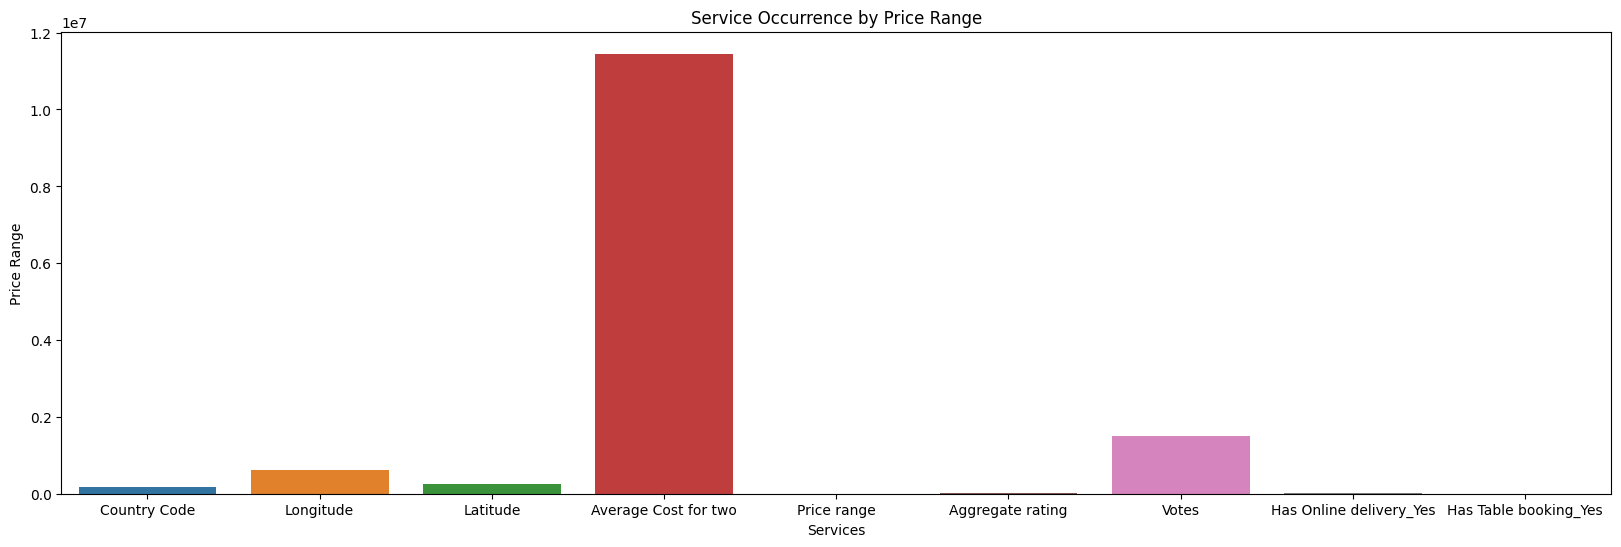

In [140]:
# Map price range categories to numerical values
price_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
dataset['Price range'] = dataset['Price range'].map(price_mapping)

# Categorize restaurants by price range
def categorize_price(price):
    if price < 2:
        return 'Low'
    elif price < 3:
        return 'Medium'
    else:
        return 'High'

dataset['Price Range'] = dataset['Price range'].apply(categorize_price)

# Convert categorical columns to numerical using binary encoding
services = ['Has Online delivery', 'Has Table booking']
data_encoded = pd.get_dummies(dataset, columns=services, drop_first=True)

# Calculate service occurrence by price range
price_range_services = data_encoded.groupby('Price Range').sum()

# Remove the 'Restaurant ID' column as it contains strings
price_range_services = price_range_services.drop(columns=['Restaurant ID'])

# Plot a heatmap to visualize service occurrence by price range
# Plot a heatmap to visualize service occurrence by price range
plt.figure(figsize=(20, 6))
# Remove annot=True and cmap='YlGnBu'
sns.barplot(data=price_range_services)
plt.title('Service Occurrence by Price Range')
plt.xlabel('Services')
plt.ylabel('Price Range')
plt.show()